Introduction

# 🧪 Exploratory Data Analysis on Pima Indians Diabetes Dataset

This notebook presents an exploratory data analysis (EDA) on the **Pima Indians Diabetes dataset**. The dataset includes diagnostic measurements from female patients of Pima Indian heritage, with a binary target variable indicating whether or not a patient has diabetes.

The main objectives of this analysis are:
- To understand the structure and quality of the dataset.
- To identify missing or invalid values.
- To explore feature distributions and relationships.
- To prepare the data for future machine learning modeling.


## 📦 Importing Required Libraries

We import standard Python libraries for data manipulation, visualization, and statistical analysis.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("diabetes.csv")

## 📂 Load and Preview the Dataset

We load the dataset and check the number of rows and columns. Also, we preview the first few rows to understand the format and types of values present.


In [27]:
df.shape

(768, 9)

In [28]:
columns = df.columns
columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Identify Feature Data Types

In [30]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Univariate Analysis

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 📊 Dataset Summary

This summary provides descriptive statistics such as mean, standard deviation, and range for each feature. It helps to detect anomalies, extreme values, and understand variable scales.


## 📈 Feature Distributions

Visualizing the distribution of each feature helps us understand how values are spread, detect skewness, and identify potential outliers.


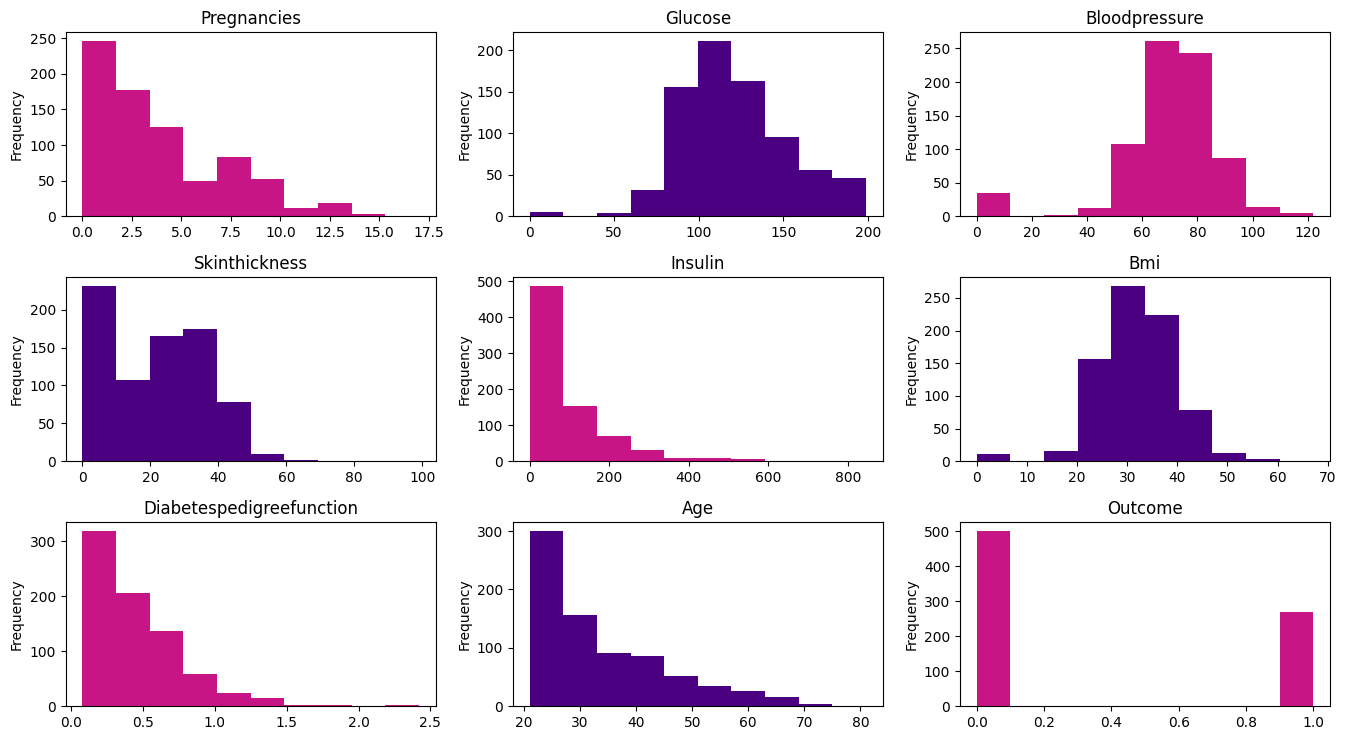

In [33]:
# Plot settings
plt.rcParams["figure.figsize"] = (13.5, 7.5) 
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, axes = plt.subplots(3, 3)  

# Colors for alternating histograms
colors = ["MEDIUMVIOLETRED", "INDIGO"]

# Columns and titles for the plots
columns = [
    ('Pregnancies', 0, 0), ('Glucose', 0, 1), ('BloodPressure', 0, 2),
    ('SkinThickness', 1, 0), ('Insulin', 1, 1), ('BMI', 1, 2),
    ('DiabetesPedigreeFunction', 2, 0), ('Age', 2, 1), ('Outcome', 2, 2)
]

# Loop for automatic plotting
for idx, (col, row, col_pos) in enumerate(columns):
    color = colors[idx % 2] # Changing colors
    df[col].plot.hist(
        title=col.replace("_", " ").title(),  
        ax=axes[row][col_pos],
        color=color
    )

plt.tight_layout()  
plt.show()

 Check for Missing or Invalid Values

In [34]:
df = pd.read_csv("diabetes.csv")

#Columns with suspicious null values
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Count number of null values ​​per column
for col in cols_with_zero_as_missing:
    num_zeros = (df[col] == 0).sum()
    print(f"{col}: Number of zero values = {num_zeros}")

Glucose: Number of zero values = 5
BloodPressure: Number of zero values = 35
SkinThickness: Number of zero values = 227
Insulin: Number of zero values = 374
BMI: Number of zero values = 11


## ❗ Detecting Invalid Values

Some features like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` should not contain zero values, as zero is not physiologically meaningful. These zeros are likely placeholders for missing data and will be treated accordingly.


Dealing with missing values: replacing with the median

In [35]:
for col in cols_with_zero_as_missing:
    median = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median)

## 🛠️ Data Cleaning: Replacing Invalid Values

We replace the invalid zero values with the median of the non-zero values in each respective feature. This method maintains the distribution while addressing biologically implausible entries.


## 📦 Outlier Detection

Using boxplots, we detect potential outliers that may influence model performance. While not all outliers are errors, recognizing them can guide feature scaling or transformation later.


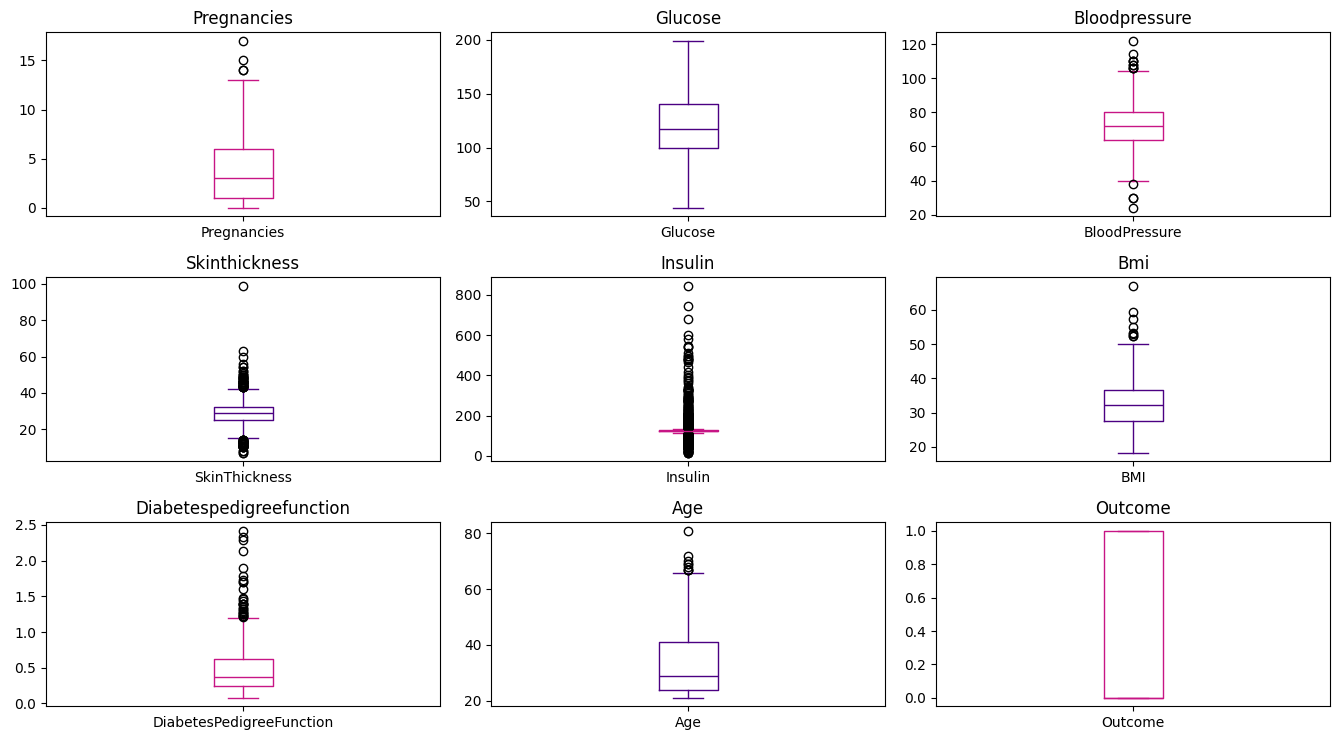

In [36]:
# Plot settings
plt.rcParams["figure.figsize"] = (13.5, 7.5)  
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, axes = plt.subplots(3, 3)  

# Colors for alternating boxplots
colors = ["MEDIUMVIOLETRED", "INDIGO"]

# Columns and their positions in the grid
columns = [
    ('Pregnancies', 0, 0), ('Glucose', 0, 1), ('BloodPressure', 0, 2),
    ('SkinThickness', 1, 0), ('Insulin', 1, 1), ('BMI', 1, 2),
    ('DiabetesPedigreeFunction', 2, 0), ('Age', 2, 1), ('Outcome', 2, 2)
]

# Automatic plotting with loop
for idx, (col, row, col_pos) in enumerate(columns):
    df[col].plot.box(
        title=col.replace("_", " ").title(),  
        ax=axes[row][col_pos],
        color=colors[idx % 2]  # Changing colors
    )

plt.tight_layout() 
plt.show()

Using the IQR (interquartile range) to remove or reduce outliers

In [37]:
# Function to handle outliers in a specified column of the dataframe
# Uses the IQR (Interquartile Range) method to identify and replace outliers with the median value
def handle_outliers(col):
    # Calculate first quartile (25th percentile)
    Q1 = df[col].quantile(0.25)
    # Calculate third quartile (75th percentile)
    Q3 = df[col].quantile(0.75)
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    # Calculate lower threshold for outliers (Q1 - 1.5*IQR)
    lower_limit = Q1 - 1.5 * IQR
    # Calculate upper threshold for outliers (Q3 + 1.5*IQR)
    upper_limit = Q3 + 1.5 * IQR
    # Get the median value of the column
    median_val = df[col].median()
    # Replace values below lower limit with median
    df.loc[df[col] < lower_limit, col] = median_val
    # Replace values above upper limit with median
    df.loc[df[col] > upper_limit, col] = median_val

# Handle outliers for each specified column in the dataset
handle_outliers('Glucose') 
handle_outliers('BloodPressure') 
handle_outliers('SkinThickness') 
handle_outliers('Insulin')
handle_outliers('BMI') 
handle_outliers('DiabetesPedigreeFunction') 
handle_outliers('Age')

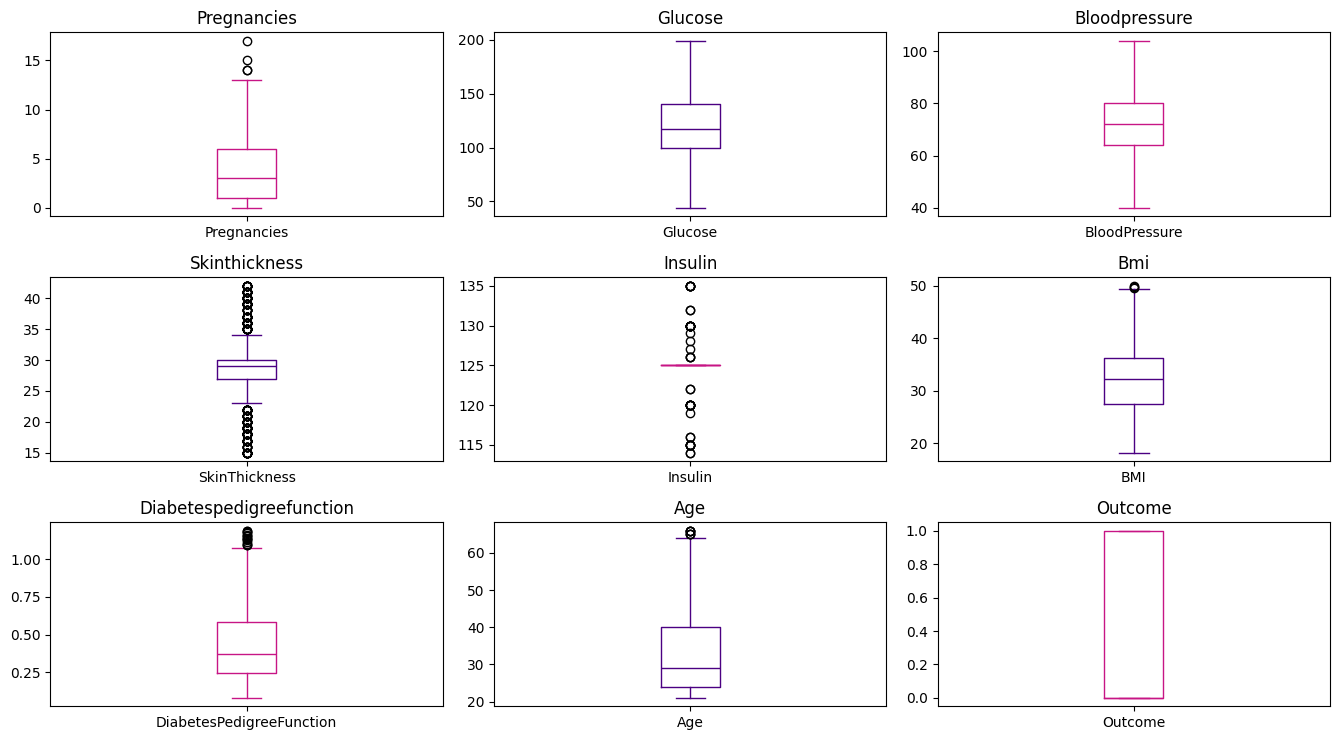

In [38]:
# Plot settings
plt.rcParams["figure.figsize"] = (13.5, 7.5)  
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, axes = plt.subplots(3, 3)  

# Colors for alternating boxplots
colors = ["MEDIUMVIOLETRED", "INDIGO"]

# Columns and their positions in the grid
columns = [
    ('Pregnancies', 0, 0), ('Glucose', 0, 1), ('BloodPressure', 0, 2),
    ('SkinThickness', 1, 0), ('Insulin', 1, 1), ('BMI', 1, 2),
    ('DiabetesPedigreeFunction', 2, 0), ('Age', 2, 1), ('Outcome', 2, 2)
]

# Automatic plotting with loop
for idx, (col, row, col_pos) in enumerate(columns):
    df[col].plot.box(
        title=col.replace("_", " ").title(),  
        ax=axes[row][col_pos],
        color=colors[idx % 2]  # Changing colors
    )

plt.tight_layout() 
plt.show()

## 🔗 Feature Correlation Analysis

Correlation analysis helps reveal linear relationships between features. This information can guide feature selection or help identify multicollinearity before modeling.


In [39]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.180575,0.118117,-0.009171,0.042079,0.003771,0.562696,0.221898
Glucose,0.128213,1.000000,0.208368,0.126562,0.072931,0.228111,0.081613,0.274264,0.492782
BloodPressure,0.180575,0.208368,1.000000,0.142738,0.018162,0.263335,0.033407,0.316307,0.166424
SkinThickness,0.118117,0.126562,0.142738,1.000000,0.003986,0.422464,0.074806,0.089897,0.178505
Insulin,-0.009171,0.072931,0.018162,0.003986,1.000000,-0.003349,-0.010170,0.017288,0.026280
BMI,0.042079,0.228111,0.263335,0.422464,-0.003349,1.000000,0.123608,0.077048,0.300793
DiabetesPedigreeFunction,0.003771,0.081613,0.033407,0.074806,-0.010170,0.123608,1.000000,0.036109,0.151994
Age,0.562696,0.274264,0.316307,0.089897,0.017288,0.077048,0.036109,1.000000,0.265858
Outcome,0.221898,0.492782,0.166424,0.178505,0.026280,0.300793,0.151994,0.265858,1.000000


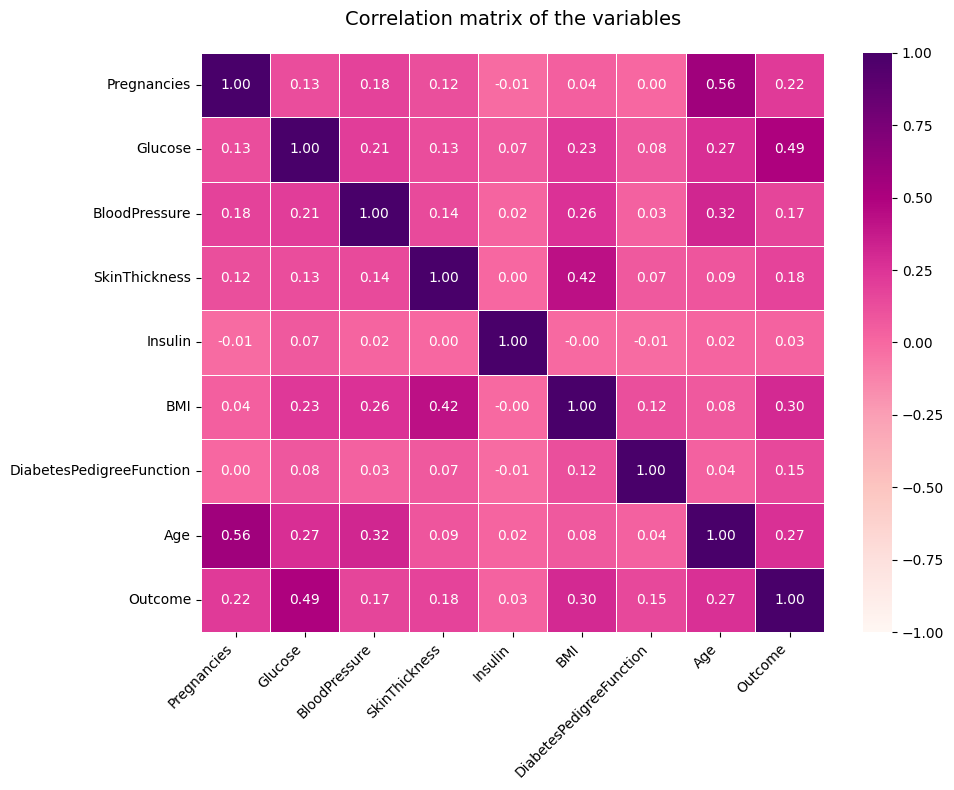

In [40]:
# Heatmap with advanced settings
plt.figure(figsize=(10, 8))  
dataplot = sns.heatmap(
    df.corr(), 
    cmap='RdPu', 
    annot=True, 
    center=0,
    fmt=".2f",       # Number format: 2 decimal places
    linewidths=0.5,  # Dünne Linien zwischen Zellen
    linecolor='white',  # Line color
    vmin=-1,         # Lower color limit (for better contrast)
    vmax=1           # Upper color limit
)

# Add title
plt.title("Correlation matrix of the variables", pad=20, fontsize=14)

# Rotation of x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show heatmap
plt.tight_layout()
plt.show()

Checking highly correlated attributes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2700\1971607189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=var, data=df, ax=ax, palette=palette)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2700\1971607189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=var, data=df, ax=ax, palette=palette)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2700\1971607189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=var, data=df, ax=ax, palette=palette)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2700\1971

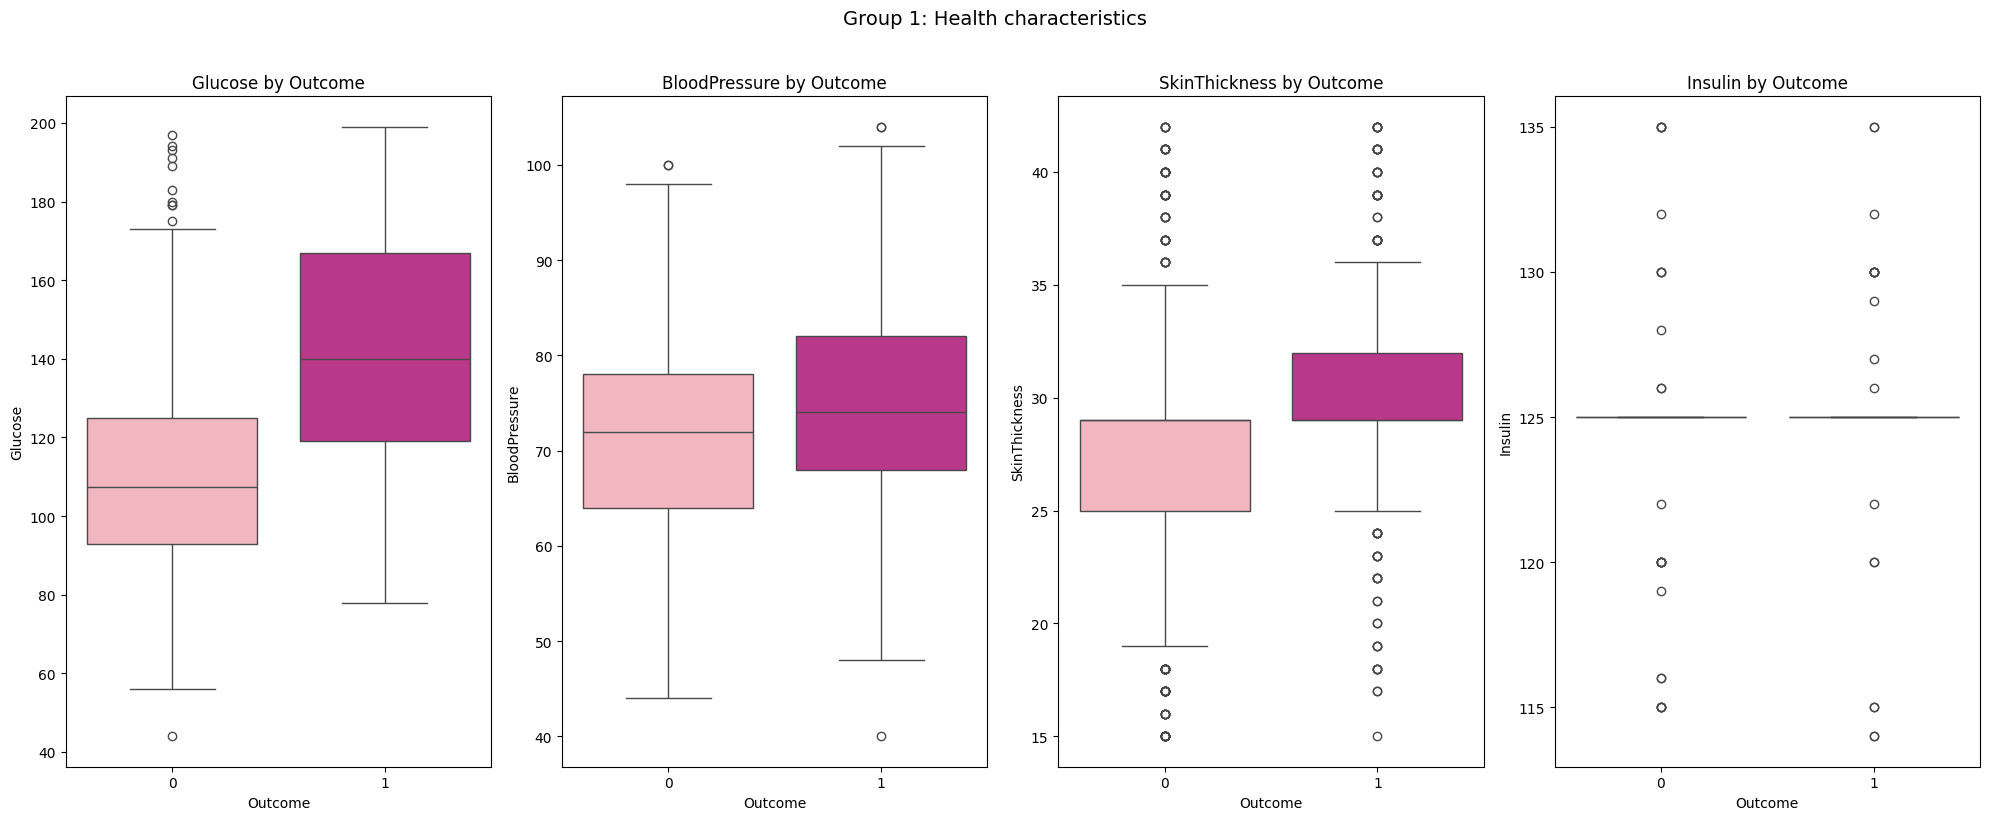

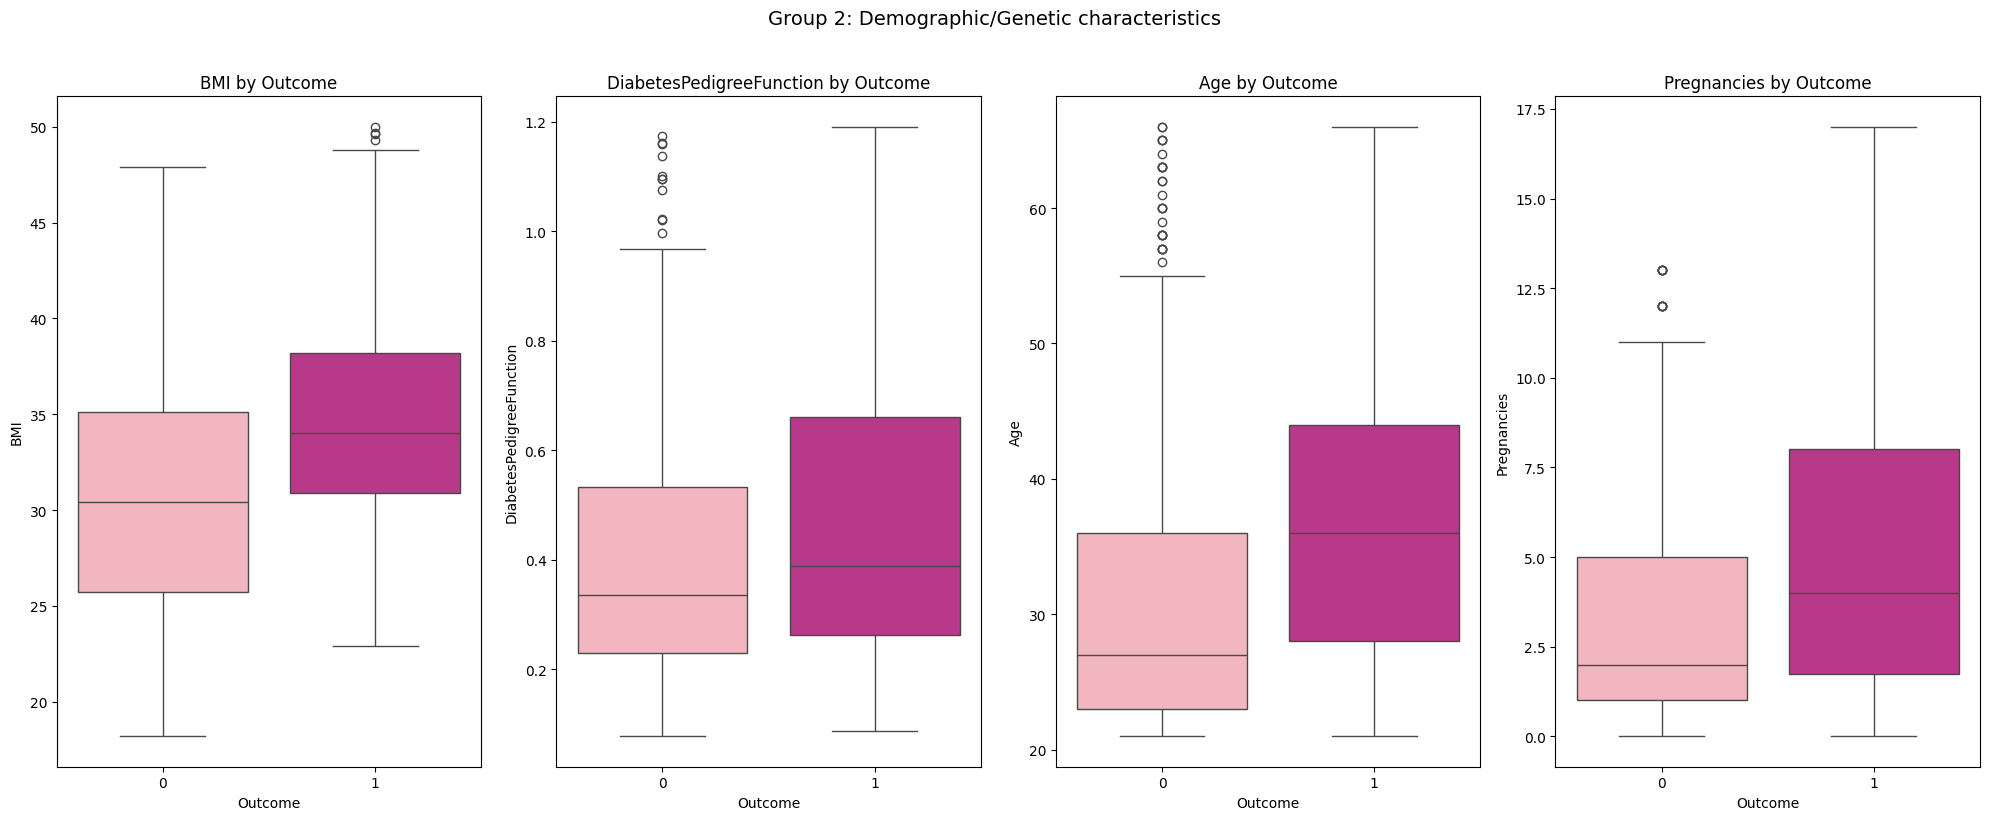

In [41]:
# Global Settings
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['figure.autolayout'] = True 

# List of variables for each figure
variables_group1 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
variables_group2 = ['BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']

# Function to create boxplots
def plot_boxplots(variables, palette="RdPu"):
    fig, axes = plt.subplots(1, 4)
    for ax, var in zip(axes, variables):
        sns.boxplot(x='Outcome', y=var, data=df, ax=ax, palette=palette)
        ax.set_title(f'{var} by Outcome', fontsize=12)
    return fig

# First Figure
fig1 = plot_boxplots(variables_group1)
fig1.suptitle("Group 1: Health characteristics", y=1.02, fontsize=14)

# Second Figure
fig2 = plot_boxplots(variables_group2)
fig2.suptitle("Group 2: Demographic/Genetic characteristics", y=1.02, fontsize=14)

plt.show()

In [42]:
# Get all columns from DataFrame (or manually define: columns = ['Glucose', 'Insulin', ...])
columns = df.columns  

# Correlation threshold (adjustable based on needs)
THRESHOLD = 0.5  # Pairs with absolute correlation >= 0.5 will be identified

# Dictionary to store correlated feature pairs and their correlation values
correlated_pairs = {}

# Nested loop to check all possible column pairs
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):  # Avoid duplicate pairs and self-correlation
        col1, col2 = columns[i], columns[j]
        
        # Calculate Pearson correlation between the two columns
        corr = df[col1].corr(df[col2])
        
        # Check if absolute correlation meets/exceeds threshold
        if abs(corr) >= THRESHOLD:  # Absolute value catches both positive/negative correlations
            # Store the pair and correlation value
            correlated_pairs[(col1, col2)] = corr
            
            # Print warning about potentially redundant features
            print(f"Strong correlation ({corr:.2f}): '{col1}' and '{col2}'. "
                  f"Consider removing one of these columns.")

# Optional: Display summary of correlated pairs as a DataFrame
if correlated_pairs:
    # Create DataFrame for better visualization of results
    corr_df = pd.DataFrame({
        'Feature 1': [pair[0] for pair in correlated_pairs.keys()],
        'Feature 2': [pair[1] for pair in correlated_pairs.keys()],
        'Correlation': correlated_pairs.values()
    })
    
    print("\nSummary of correlated features:")
    # Sort by absolute correlation strength (descending)
    print(corr_df.sort_values(by='Correlation', key=abs, ascending=False))
else:
    print("No strong correlations found (above threshold).")

Strong correlation (0.56): 'Pregnancies' and 'Age'. Consider removing one of these columns.

Summary of correlated features:
     Feature 1 Feature 2  Correlation
0  Pregnancies       Age     0.562696


In [43]:
columns = df.columns[1:]  # Removes first column from the list
df = df.drop(columns=['Pregnancies'])  # (inplace=False)

In [44]:
df.shape

(768, 8)

Export of the preprocessed dataset

In [45]:
df.to_csv('Diabetes-dataset_FS.csv', encoding='utf-8', index=False)

## ✅ Conclusion and Next Steps

- We successfully explored and cleaned the Pima Indians Diabetes dataset.
- Invalid zero values were identified and imputed using medians.
- The data distributions and outliers were visualized.
- Relationships between features were explored.

In the next phase, we can proceed to:
- Feature scaling and transformation.
- Splitting the dataset for training/testing.
- Applying machine learning models for diabetes prediction.
